# Day038
## regression model 程式碼撰寫
### sklearn的Linear Regression
1. 第一行引入所需的套件
2. 第二行建立線性回歸模型，並將 X, y 資料送進模型中訓練
3. Reg 就是訓練好的模型，可以用 .predict 來預測新資料  
> from sklearn.linear_model import LinearRegression <br>
reg = LinearRegression().fit(X, y)

### sklearn的Logistic Regression
步驟同上，其中參數簡介如下
- Penalty: "L1", "L2"。使用 L1 或 L2 的正則化參數，後續有更詳細介紹
- C: 正則化的強度，數字越小，模型越簡單
- Solver: 對損失函數不同的優化方法。更詳細的內容請參考[連結](https://blog.csdn.net/lc574260570/article/details/82116197)
- Multi-class: 選擇 one-vs-rest 或 multi-nominal 分類方式，當目標是multi-class時要特別注意，若有 10 個 class， ovr 是訓練 10 個二分類模型，第一個模型負責分類(class1, non-class1)；第二個負責(class2, non-class2) ，以此類推。multi-nominal是直接訓練多分類模型。詳細參參考[連結](https://www.quora.com/What-is-the-difference-between-one-vs-all-binary-logistic-regression-and-multinomial-logistic-regression)
> from sklearn.linear_model import LogisticRegression <br>
reg = LogisticRegression().fit(X, y)

### 延伸 - [What is the difference between logistic and logit regression?](https://stats.stackexchange.com/questions/120329/what-is-the-difference-between-logistic-and-logit-regression/120364#120364)

## 範例
#### import pakage

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

#### Linear Regression
其中[np.newaxis](https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it)的作用在於把行向量轉成列向量
所以X每一項都代表一個樣本，此時的shape為 (442, 1)
若只使用 X = diabetes.data[:, 2]，會得到shape為 (442, )，是一個行向量

In [2]:
# 讀取糖尿病資料集
diabetes = datasets.load_diabetes()

# 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
X = diabetes.data[:, np.newaxis, 2]
print("Data shape: ", X.shape) # 可以看見有 442 筆資料與我們取出的其中一個 feature

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X, diabetes.target, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訊練資料丟進模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測
y_pred = regr.predict(x_test)

Data shape:  (442, 1)


In [3]:
# 可以看回歸模型的參數值
print("Coefficients: ", regr.coef_)

# 預測值與實際值間的差距: 使用MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients:  [934.05431907]
Mean squared error: 2569.69


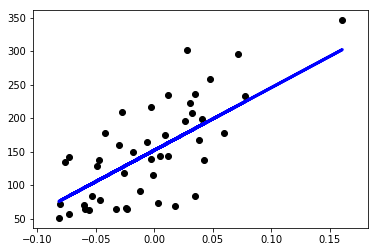

In [4]:
# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()

#### Logistic Regression

In [5]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=4)

# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)

In [6]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.8666666666666667


## 練習時間
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [7]:
boston = datasets.load_boston()
X = boston.data[:, np.newaxis, 0]
X.shape

(506, 1)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, boston.target, test_size=0.1, random_state=1)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

print("Coefficients: ", regr.coef_)

print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients:  [-0.3968583]
Mean squared error: 79.57


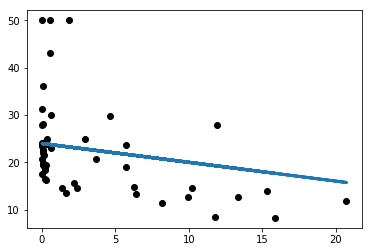

In [9]:
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_pred, linewidth=3)
plt.show()